In [1]:
#Base modules
import sys
import os

#Basic 3rd party packages
import h5py
import numpy as np
import json

#For working with images
from PIL import Image
from matplotlib import cm
import matplotlib.pyplot as plt
from matplotlib_scalebar.scalebar import ScaleBar, SI_LENGTH_RECIPROCAL

import modules.io as io
import modules.plottingtools as pl

In [154]:
import importlib
importlib.reload(io)
importlib.reload(pl)

<module 'modules.plottingtools' from '/Users/nielscautaerts/Documents/Projects/BigMax/3_Software/VeloxMeta/TEMMETA/modules/plottingtools.py'>

In [2]:
%matplotlib notebook

# importing EMD files

In [3]:
#path and filenames
path = "~/ownCloud/emdData&Reader/STEMDataNiels/"
fn1 = "SuperX-HAADF 1913.emd"
fn2 = "Al_CoCuFeMnNi_6- 31.4 Mx 1209 EDS-HAADF.emd"
fn3 = "Al_CoCuFeMnNi_6- 15.7 Mx 1606 EDS-HAADF.emd"

#combined paths
pn1 = os.path.expanduser(path + fn1)
pn2 = os.path.expanduser(path + fn2)
pn3 = os.path.expanduser(path + fn3)

#open the hdf5 files
f1 = h5py.File(pn1, 'r')
f2 = h5py.File(pn2, 'r')
f3 = h5py.File(pn3, 'r')

In [6]:
io.scan_hdf5_node(f1["Data"])

Data
    Image
        6fdbde41eecc4375b45cd86bd2be17c0
             - Data  ((256, 256, 240), uint16)
             - Metadata  ((60000, 240), uint8)
    SpectrumImage
        e70e71602cfa497992919a336577de67
             - Data  ((3330405, 1), uint8)
             - Metadata  ((60000, 1), uint8)
             - SpectrumImageSettings  ((1,), object)
    SpectrumStream
        f5a4ba0965a5444b8c46cc420cf7fef0
             - AcquisitionSettings  ((1,), object)
             - Data  ((15933353, 1), uint16)
             - Metadata  ((60000, 1), uint8)
    Text
         - e1c99057161c4e9889c42955fab1e695  ((1,), object)


Inspection tells us that:

in f1 there are 240 frames of 256x256. Image series in det_no = 0

in f2 there are 99 frames of 128x128. Image series in det_no = 2

in f3 there are 60 frames of 512x512. Image series in det_no = 4

In [10]:
im_stack1 = io.get_image_data_det_no(f1, 0)
im_stack2 = io.get_image_data_det_no(f2, 2)
im_stack3 = io.get_image_data_det_no(f3, 4)

<IPython.core.display.Javascript object>


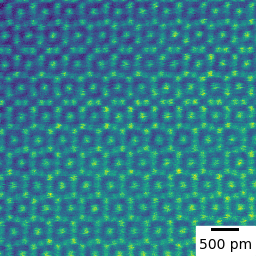

(<Figure size 256x256 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1c15fc0f90>)

In [4]:
io.plot_image_frame(f1, 0, 0)

<IPython.core.display.Javascript object>


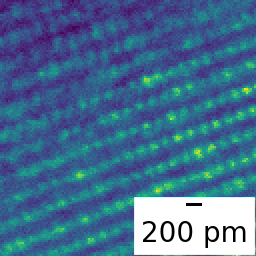

(<Figure size 128x128 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1c24b21f10>)

In [84]:
io.plot_image_frame(f2, 2, 0)

<IPython.core.display.Javascript object>


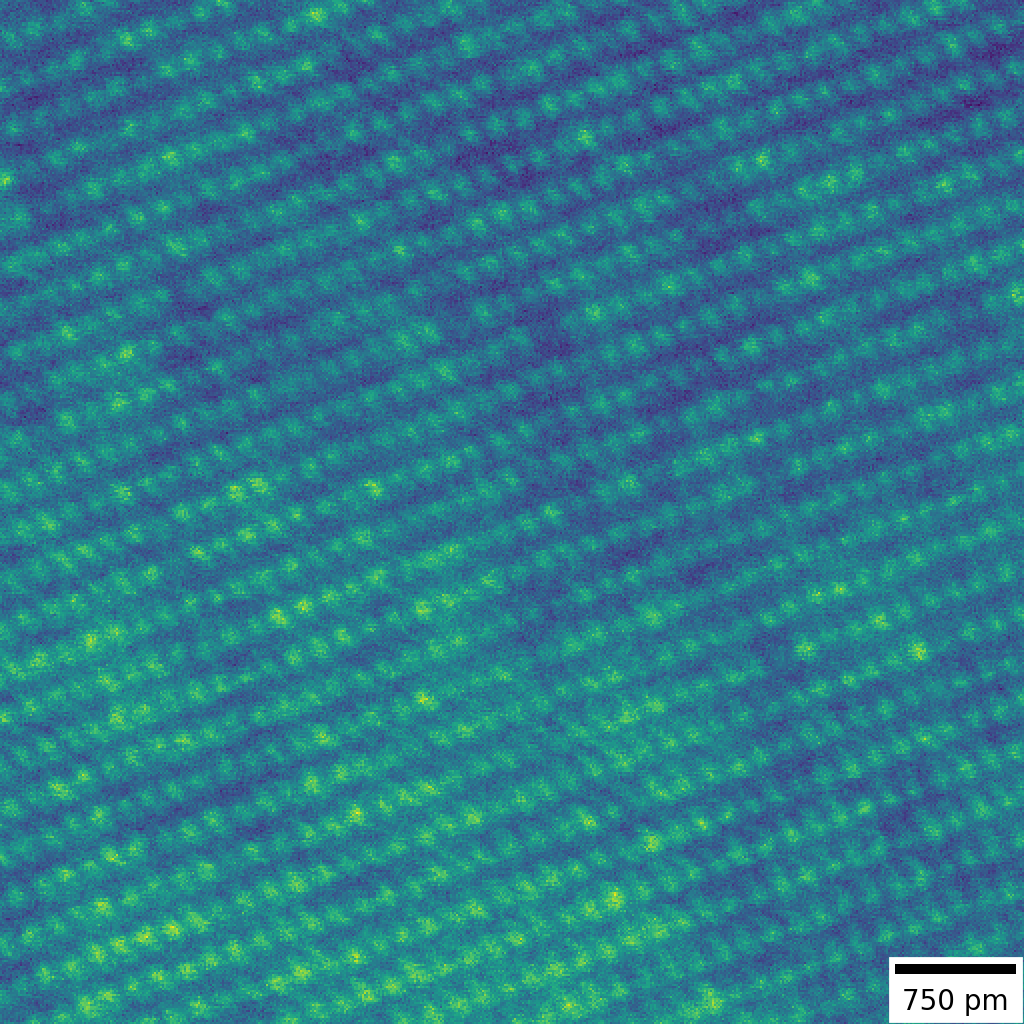

(<Figure size 512x512 with 1 Axes>,
 <matplotlib.axes._axes.Axes at 0x1c24c13810>)

In [85]:
io.plot_image_frame(f3, 4, 0)

# Working with the SpectrumStreams

In [5]:
stream1 = io.get_spectrum_stream(f1, one_matrix = True)

'get_spectrum_stream'  5998.56 ms


In [6]:
stream2 = io.get_spectrum_stream(f2, one_matrix = True)

'get_spectrum_stream'  683.80 ms


In [7]:
stream3 = io.get_spectrum_stream(f3, one_matrix = True)

'get_spectrum_stream'  5444.60 ms


<IPython.core.display.Javascript object>


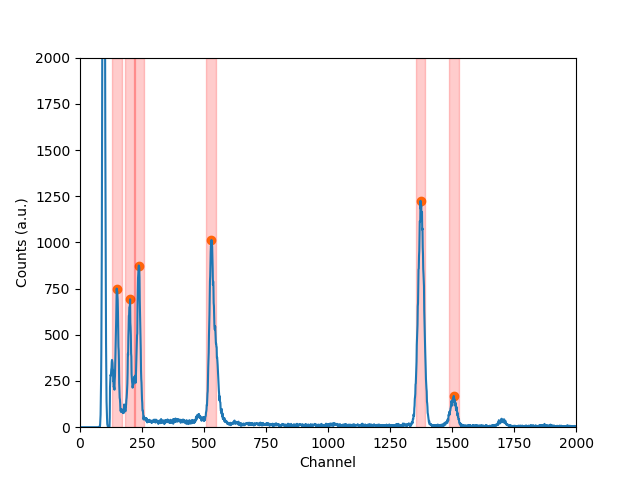

(0, 2000)

In [8]:
fig, ax, peaks, proc = pl.plot_spectrum_peaks(stream1, log = False, pf_props = {"height" : 150, "width" : 10})
ax.set_xlim(0, 2000)
ax.set_ylim(0,2000)

<IPython.core.display.Javascript object>


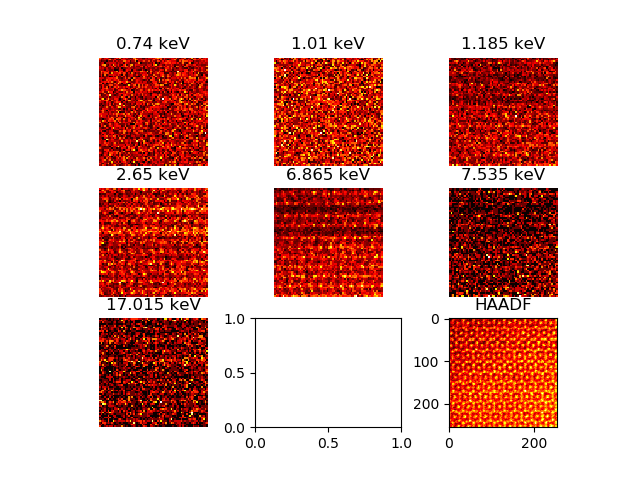

Text(0.5, 1.0, 'HAADF')

In [11]:
stream = stream1

torebin = True

numsb = len(peaks[0:]) #the first entry is not of interest
ipc = 3 #number of plots per column
fig, ax = plt.subplots(numsb // ipc + 1, ipc)
axes = ax.ravel()

rebin_peak_imgs = []

w=40
rbs = 512//8
for j, i in enumerate(peaks[0:]):
    energy = i*stream.disp/1000
    width = w*stream.disp/1000
    dt = stream.get_image_peak_sum(energy, width)
    if torebin:
        dt_r = pl.rebin(dt, [rbs, rbs])
    else:
        dt_r = dt
    rebin_peak_imgs.append(dt_r)
    axes[j].set_title("{} keV".format(energy))
    axes[j].imshow(dt_r, cmap = "hot")
    axes[j].set_axis_off()
    
axes[-1].imshow(im_stack1[:,:,0], cmap = "hot")
axes[-1].set_title("HAADF")

In [59]:
help(io.plot_single_image)

Help on function plot_single_image in module modules.io:

plot_single_image(imgdata: numpy.ndarray, metadata: dict, filename: str = '', scale_bar: bool = True, show_fig: bool = True, dpi: int = 100, save_meta: bool = True, sb_settings: dict = {'location': 'lower right', 'color': 'k', 'length_fraction': 0.15}, imshow_kwargs: dict = {})
    Plot a single NxN numpy array representing an image. Potentiallys save to a TIFF file.
    
    Args:
    imgdata (np.ndarray) : the image frame
    metadata (dict) : the metadata dictionary corresponding to the file
    filename (str) : the filename to which you want to save the image. if empty is not saved.
    scale_bar (bool) = True : whether to add a scale bar to the image. Metadata must contain this information.
    show_fig (bool) = True : whether to show the figure
    dpi (int) = 100 : dpi to save the image with
    save_meta (bool) = True : save the metadata also as a separate json file with the same filename as the image
    sb_settings (di

In [158]:
plt.close('all')

Traceback (most recent call last):
  File "/Users/nielscautaerts/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/nielscautaerts/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/Users/nielscautaerts/anaconda3/lib/python3.7/site-packages/matplotlib/_pylab_helpers.py", line 53, in destroy
    cls._activeQue.remove(manager)
ValueError: list.remove(x): x not in list
Traceback (most recent call last):
  File "/Users/nielscautaerts/anaconda3/lib/python3.7/site-packages/matplotlib/cbook/__init__.py", line 216, in process
    func(*args, **kwargs)
  File "/Users/nielscautaerts/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_nbagg.py", line 236, in <lambda>
    canvas.mpl_connect('close_event', lambda event: Gcf.destroy(num))
  File "/Users/nielscautaerts/anaconda3/lib/

<IPython.core.display.Javascript object>


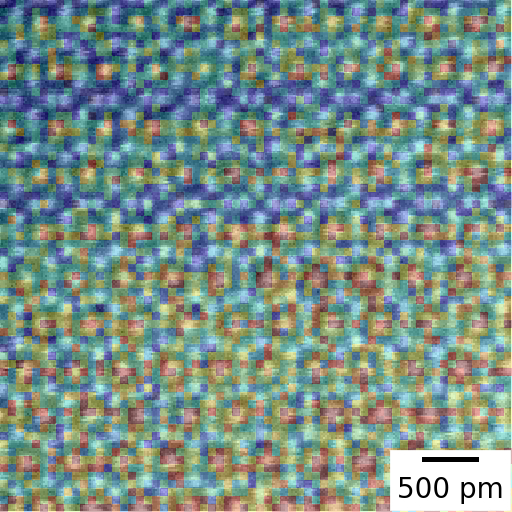

In [167]:
fig, ax = io.plot_image_frame(f1, 0, 0, imshow_kwargs = {"cmap": "Greys_r"})

ax.imshow(rebin_peak_imgs[4], alpha = 0.3, extent = (0, 256, 256, 0), cmap = "jet", vmax =1)

In [96]:
from modules.decorators import timeit

@timeit
def loop(num):
    for i in range(num):
        1+1
        
loop(6000000000)

'loop'  147827.51 ms


In [119]:
stream1.get_frame_list(convert = True)

[<65536x4096 sparse matrix of type '<class 'numpy.int16'>'
 	with 896 stored elements in Compressed Sparse Row format>,
 <65536x4096 sparse matrix of type '<class 'numpy.int16'>'
 	with 843 stored elements in Compressed Sparse Row format>,
 <65536x4096 sparse matrix of type '<class 'numpy.int16'>'
 	with 899 stored elements in Compressed Sparse Row format>,
 <65536x4096 sparse matrix of type '<class 'numpy.int16'>'
 	with 898 stored elements in Compressed Sparse Row format>,
 <65536x4096 sparse matrix of type '<class 'numpy.int16'>'
 	with 813 stored elements in Compressed Sparse Row format>,
 <65536x4096 sparse matrix of type '<class 'numpy.int16'>'
 	with 906 stored elements in Compressed Sparse Row format>,
 <65536x4096 sparse matrix of type '<class 'numpy.int16'>'
 	with 823 stored elements in Compressed Sparse Row format>,
 <65536x4096 sparse matrix of type '<class 'numpy.int16'>'
 	with 866 stored elements in Compressed Sparse Row format>,
 <65536x4096 sparse matrix of type '<cla

In [123]:
from scipy.sparse import save_npz

#stream1.data[0]

path = "./SpectrumStreamHAADF1913/"
if not os.path.exists(path):
    os.makedirs(path)
    
for j,i in enumerate(stream1.data):
    name = "Frame{}".format(j)
    save_npz(path+name, i)

In [125]:
len(stream1.data)

239

In [140]:
from scipy.sparse import load_npz

In [145]:
#import the data again
streamdata = []

for j, i in enumerate(os.listdir(path)):
    name = "Frame{}.npz".format(j)
    dt_sparse = load_npz(path+name)
    dt = io.SpectrumStream.reshape_sparse_matrix(dt_sparse, (4096, 256, 256))
    streamdata.append(dt)

In [146]:
streamdata

[array([[[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        ...,
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         ...,
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0]],
 
        [[0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],
         [0, 0, 0, ..., 0, 0, 0],

In [155]:
io.save_all_image_frames(f1, det_no = 0, name = "HAADFFrame", path = "./HAADFSuperX1913_2/" ,
               scale_bar = False, show_fig = False, dpi = 100, save_meta = False,
                imshow_kwargs = {"cmap": "Greys_r"})


'save_all_image_frames'  30480.16 ms
